# Lesson 1: Data Manipulation 

## 0.1 Python Modules & Packages

**Modules** in Python are simply python files that contain functions, objects, etc. designed to perform a specifc function. 

**Packages** in Python refer to a collection of multiple modules that are grouped together. 

There are currently > 200,000 publicly available Python packages on the official python package list and utilizing these packages in your Python code will allow you to easily perform a variety tasks. 

Some common packages are:
- `os` -> Operating system related tasks
- `numpy` -> Fundamental package for scientific computing in Python
- `matplotlib.pyplot` -> Basic Plotting Module of the matplotlib package
- `seaborn` -> Fancy plotting
- `pandas` -> Data manipulation and analysis
- `scikit-learn` -> Advanced data analysis

Before you can use a package, you must install the package on your computer. However, Google Colab has all packages already installed availalbe for use.
To use a package in your code, you must first import the package which can be done a couple different ways using the `import` command.


You can import the entire package using the following syntax 
   
    import <package_name>


In [1]:
# Imports the entire os package
import os

Packages with names more than a few letters are typically given an **alias**

    import <package_name> as <alias>
    
Many common packages have conventional aliases.
- `numpy` -> `np`
- `matplotlib.pyplot` -> `plt`
- `seaborn` -> `sns`
- `pandas` -> `pd`


In [2]:
# Import packages using an alias 
import numpy as np # Imports NumPy and gives it the name "np"
import pandas as pd # Imports Pandas and gives it the name "pd"

You can also import a specific module of a package. This avoids importing the entire package and allows you to alias just that module.

    import <package_name>.<module_name> as <alias>

In [3]:
# Import the plotting module of the Matplotlib package and give it a short alias
import matplotlib.pyplot as plt

Lastly, you can import only specfic functions from a package or module to avoid importing and entire package

    from <package_name>.<module_name> import <function1>, <function2>, ... 

In [4]:
# Import the isdir() and isfile() functions from the os.path module
from os.path import isdir, isfile

For best practices: 
- All import statements should be place together at the top of your file
- Each package should be on a different line 
- Import statements are organized from most broad to most specfic 
    - Package imports 
    - Module imports 
    - Function imports

In [5]:
# Import packages with proper formatting
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from os.path import isdir, isfile

## 0.2 Review of basic `numpy`

NumPy arrays are efficent ways to store data that have many useful properties. 
Values inside of `np.array` objects can be selected the same as python lists and NumPy arrays have built in functions like `.mean()` and `.max()` that easily perform array operations.

In [38]:
a = np.array([1,2,3,4,5,5,6,6])

print(a[0])
print(a[1:3])
print(a.mean())
print(a.max())

1
[2 3]
4.0
6


Additonally, the `numpy` package has other functions that can be applied to arrays such as `np.unique()` which returns an array without any repeat values

In [39]:
np.unique(a)

array([1, 2, 3, 4, 5, 6])

You can perform numerical operations on arrays to generate new values.

In [40]:
# Create a new array by adding 3 to the previous array
b = a + 3

b

array([4, 5, 6, 7, 8, 8, 9, 9])

In addition to numerical operations you can perform conditional operations on an array. 

Below we check to see which values are less than 4.

In [41]:
# Return whether each element is less than 4
a < 4

array([ True,  True,  True, False, False, False, False, False])

By placing conditional statements inside of `[]` we can select the values of the array where the conditional statement is true

In [43]:
# Return an array of the elements that are less than 4
a[a < 4]

array([1, 2, 3])

## Section 1: Data manipulation with `pandas`

### 1.1 The `DataFrame`

Pandas stores data in tables called `DataFrames`. 

<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg" height=300px width=auto>

Each `DataFrame` is made of **rows** and **columns** of data. 

The header of the `DataFrame` contains the name of each column.

The `Index` of the `DataFrame` contains a unique name for each row. The `Index` defaults to row numbers but can be anything (Dates, Strings,etc.) as long as it is unique for each row.

Each column of a `DataFrame` is stored as a `numpy.array`. You can make a `DataFrame` manually by specifying the column names and the values in each column.

In [10]:
# Create simple DataFrame 
df = pd.DataFrame({
    'A': np.array([1,2,3]),
    'B': np.array([4,5,6]),
    'C': np.array(['do','re','mi'])
})

df

,A,B,C
0,1,4,do
1,2,5,re
2,3,6,mi


Data stored in a `pandas` object can be returned to a `numpy.array` using the `to_numpy()` function.

To turn the entire `DataFrame` back into a `numpy.array` would use the following syntax:

    df.to_numpy()
    
**Note:** This will not save any information in the `Index` or column labels.

In [11]:
# Turn the DataFrame into a 2D np.array
df.to_numpy()

array([[1, 4, 'do'],
       [2, 5, 're'],
       [3, 6, 'mi']], dtype=object)

### 1.2 Loading data from a file

You can read/write data to/from a `DataFrame` using a variety of file types

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg" height=500px width=auto>

To create a data frame from a file you can use the following syntax

    df = pd.read_<file-type>(file_path)
    
For example to read data from a .csv file you would use

    df = pd.read_csv(file_path)

In [12]:
# Loads data from country_vaccinations.csv into a DataFrame
df = pd.read_csv("data/country_vaccinations.csv")

df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


### 1.3 Viewing Data

You can get a summary of the column names and how many non-empty rows each column has using the `.info()` function

    df.info()
    
This is a useful first step to become familiar with the column names and ensure your data loaded correctly 

In [13]:
# Displays the number of rows and columns in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

The `DataFrame.head()` and `DataFrame.tail()` functions to view the top and bottoms rows of the `DataFrame`. 

The default is 5 rows, but you can optionally specify the number of rows you would like to see.

In [14]:
# Show the top 5 rows of the DataFrame
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [15]:
# Shows the bottom 10 rows of the DataFrame
df.tail(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
86502,Zimbabwe,ZWE,2022-03-20,8210637.0,4418956.0,3444793.0,2915.0,30641.0,54.40,29.28,22.83,2030.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86503,Zimbabwe,ZWE,2022-03-21,8230061.0,4432618.0,3446894.0,19424.0,9630.0,54.53,29.37,22.84,638.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86504,Zimbabwe,ZWE,2022-03-22,8313471.0,4503937.0,3450864.0,83410.0,19990.0,55.08,29.84,22.87,1325.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86505,Zimbabwe,ZWE,2022-03-23,8414477.0,4589712.0,3455926.0,101006.0,32456.0,55.75,30.41,22.90,2151.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86506,Zimbabwe,ZWE,2022-03-24,8552429.0,4704720.0,3461926.0,137952.0,51151.0,56.67,31.17,22.94,3389.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86511,Zimbabwe,ZWE,2022-03-29,9039729.0,5053114.0,3510256.0,105369.0,103751.0,59.90,33.48,23.26,6874.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...




The `DataFrame.describe()` method will report summary statistics for all numerical columns



In [16]:
# Shows summary statistics for all of the numerical columns in the DataFrame
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
std,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000


### 1.4 Selecting Data by Position

Similar to `numpy.array` you can easily select subsets of your `DataFrame` based on their location in the `DataFrame`. 

To select an entire column use `[]` with the column name as a string. 

    df[column_name]

In [44]:
# Select a single column
df["country"]

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
86507       Zimbabwe
86508       Zimbabwe
86509       Zimbabwe
86510       Zimbabwe
86511       Zimbabwe
Name: country, Length: 86512, dtype: object

To locate specific rows and column use the `DataFrame.loc[]` and `DataFrame.iloc[]` methods

Using `.loc[]` uses the names of the columns and rows 

    df.loc[index_name,column_name]
    
Using `.iloc[]` uses the row and column numbers instead of the name

    df.iloc[index_number,column_number]
    

In [18]:
# Show rows 1000-1010 and columns "country" and date
df.loc[1000:1010,["country","date"]]

,country,date
1000,Algeria,2021-07-15
1001,Algeria,2021-07-16
1002,Algeria,2021-07-17
1003,Algeria,2021-07-18
1004,Algeria,2021-07-19
1005,Algeria,2021-07-20
1006,Algeria,2021-07-21
1007,Algeria,2021-07-22
1008,Algeria,2021-07-23
1009,Algeria,2021-07-24


In [19]:
# Shows rows 1000-1010 and the columns at index 0 and 2. Should be the same as the previous example
df.iloc[1000:1011,[0,2]]

,country,date
1000,Algeria,2021-07-15
1001,Algeria,2021-07-16
1002,Algeria,2021-07-17
1003,Algeria,2021-07-18
1004,Algeria,2021-07-19
1005,Algeria,2021-07-20
1006,Algeria,2021-07-21
1007,Algeria,2021-07-22
1008,Algeria,2021-07-23
1009,Algeria,2021-07-24


### 1.5 Selecting Data by Condition

Similar to conditional indexing in `numpy`, you can also select values from a `DataFrame` if they meet specific conditions.

By placing a conditional statement inside of `[]` you will select only **rows** where that condition is true.

For example, the following syntax will select all the rows where a specific column is equal to a specfic value.

    df[df[column_name] == value]

In [20]:
# Selects all rows where the country name is United States and saves them as a separate database
usa_df = df[df["country"] == "United States"]

usa_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
82360,United States,USA,2020-12-13,30288.0,25125.0,5897.0,NaN,NaN,0.01,0.01,0.0,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82361,United States,USA,2020-12-14,34867.0,29543.0,6017.0,4579.0,4579.0,0.01,0.01,0.0,14.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82362,United States,USA,2020-12-15,84638.0,76984.0,6281.0,49771.0,27175.0,0.03,0.02,0.0,82.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82363,United States,USA,2020-12-16,244549.0,231496.0,6757.0,159911.0,71420.0,0.07,0.07,0.0,215.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82364,United States,USA,2020-12-17,517161.0,496980.0,7507.0,272612.0,121718.0,0.16,0.15,0.0,367.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...


Notice here when creating a new `DataFrame` from an existing `DataFrame` all of the information is retained, including the `Index`. 

This means that the following code would **error** if ran as there aren't rows named 0 through 2

    usa_df.loc[0:2,:]
    
However this code would run and return the first 3 rows
    
    usa_df.iloc[0:3,:]

In [21]:
# Incorrect code
# usa_df.loc[0:3,:] rows with names 0:2 do not exist

# Gets the first 3 rows by name
usa_df.loc[82360:82362,:]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
82360,United States,USA,2020-12-13,30288.0,25125.0,5897.0,NaN,NaN,0.01,0.01,0.0,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82361,United States,USA,2020-12-14,34867.0,29543.0,6017.0,4579.0,4579.0,0.01,0.01,0.0,14.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82362,United States,USA,2020-12-15,84638.0,76984.0,6281.0,49771.0,27175.0,0.03,0.02,0.0,82.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...


In [22]:
# Gets the first 3 rows by number
usa_df.iloc[0:3,:]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
82360,United States,USA,2020-12-13,30288.0,25125.0,5897.0,NaN,NaN,0.01,0.01,0.0,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82361,United States,USA,2020-12-14,34867.0,29543.0,6017.0,4579.0,4579.0,0.01,0.01,0.0,14.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82362,United States,USA,2020-12-15,84638.0,76984.0,6281.0,49771.0,27175.0,0.03,0.02,0.0,82.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...


You can use more than one conditional statement to further refine your selection.

To do this, place `()` around each conditional statement and use the following logical operators to separate each statement.
- `&` -> `and` 
- `|` -> `or`
- `~` -> `not`

In [23]:
# Select rows in the usa_df where the daily vaccinations were above 2,000,000 and the total vaccination were above 250,000,000
# Separting each condition with a newline can help make the code more readable
usa_df[(usa_df['daily_vaccinations'] > 2000000) & 
       (usa_df['total_vaccinations'] > 250000000)]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
82494,United States,USA,2021-04-26,250134968.0,148229453.0,106603242.0,2381520.0,2718528.0,75.34,44.65,32.11,8188.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82495,United States,USA,2021-04-27,253021358.0,149332420.0,108393802.0,2886390.0,2670705.0,76.21,44.98,32.65,8044.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82496,United States,USA,2021-04-28,256101615.0,150473337.0,110360597.0,3080257.0,2615996.0,77.14,45.32,33.24,7879.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82497,United States,USA,2021-04-29,259140202.0,151581164.0,112341073.0,3038587.0,2552171.0,78.05,45.66,33.84,7687.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82498,United States,USA,2021-04-30,262040759.0,152685845.0,114193377.0,2900557.0,2497292.0,78.93,45.99,34.39,7522.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82499,United States,USA,2021-05-01,263882335.0,153389976.0,115358581.0,1841576.0,2445701.0,79.48,46.20,34.75,7366.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82500,United States,USA,2021-05-02,264759725.0,153714734.0,115943614.0,877390.0,2429468.0,79.74,46.30,34.92,7317.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82501,United States,USA,2021-05-03,266719650.0,154350421.0,117346292.0,1959925.0,2369240.0,80.34,46.49,35.34,7136.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82502,United States,USA,2021-05-04,269218129.0,155163923.0,119106237.0,2498479.0,2313824.0,81.09,46.73,35.87,6969.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82503,United States,USA,2021-05-05,271760827.0,155975804.0,120912594.0,2542698.0,2237030.0,81.85,46.98,36.42,6738.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...


Another useful ways to select rows are if the values are part of some set of values. 

The `.isin()` function selects values if they are contained within a list of possible values.

    df[column_name].isin(value_list)

In [24]:
# make a list of north american countries of interest
north_amer_countries = ["Canada", "United States", "Mexico"]

# select only the rows where the country column has a value in the list above
df[df["country"].isin(north_amer_countries)]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
13403,Canada,CAN,2020-12-14,5.0,5.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
13404,Canada,CAN,2020-12-15,727.0,727.0,NaN,722.0,722.0,0.00,0.00,NaN,19.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
13405,Canada,CAN,2020-12-16,3025.0,3025.0,NaN,2298.0,1510.0,0.01,0.01,NaN,40.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
13406,Canada,CAN,2020-12-17,7279.0,7279.0,NaN,4254.0,2425.0,0.02,0.02,NaN,64.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
13407,Canada,CAN,2020-12-18,11296.0,11296.0,NaN,4017.0,2823.0,0.03,0.03,NaN,74.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82826,United States,USA,2022-03-24,559861103.0,255273235.0,217422759.0,155644.0,156889.0,168.63,76.89,65.49,473.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82827,United States,USA,2022-03-25,560045501.0,255322519.0,217466150.0,184398.0,149541.0,168.68,76.90,65.50,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82828,United States,USA,2022-03-26,560137738.0,255348742.0,217488822.0,92237.0,143396.0,168.71,76.91,65.51,432.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82829,United States,USA,2022-03-27,560167076.0,255357149.0,217495812.0,29338.0,137525.0,168.72,76.91,65.51,414.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...


### 1.6 String methods

If your column contains a string there are a variety of additional methods you can use to generate conditional statments or manipulate the strings.

These methods are all available through the `.str` attribute used on a column that contains strings as shown below.

    df[column_name].str.<str_method>
    
An example of using a `str` method for a conditions statement is using `str.contains()` to see if a string contains a particular substring

    df[column_name].str.contains(substring)

In [45]:
# Displays rows where the country includes "stan"
stan_df = df[df["country"].str.contains("stan")]

# Display the name of each country in the DataFrame
print(stan_df['country'].unique())

stan_df

['Afghanistan' 'Kazakhstan' 'Kyrgyzstan' 'Pakistan' 'Tajikistan'
 'Turkmenistan' 'Uzbekistan']


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83570,Uzbekistan,UZB,2022-03-09,NaN,NaN,NaN,NaN,96388.0,NaN,NaN,NaN,2840.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",World Health Organization,https://covid19.who.int/
83571,Uzbekistan,UZB,2022-03-10,NaN,NaN,NaN,NaN,94167.0,NaN,NaN,NaN,2775.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",World Health Organization,https://covid19.who.int/
83572,Uzbekistan,UZB,2022-03-11,NaN,NaN,NaN,NaN,91947.0,NaN,NaN,NaN,2709.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",World Health Organization,https://covid19.who.int/
83573,Uzbekistan,UZB,2022-03-12,NaN,NaN,NaN,NaN,89726.0,NaN,NaN,NaN,2644.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",World Health Organization,https://covid19.who.int/


Examples of other common string methods that you can use with `.str` are:

- `str.lower()`            -> Makes all letters lowercase
- `str.upper()`            -> Makes all letters uppercase
- `str.capitalize()`       -> Makes all words follow proper capitalization
- `str.strip()`            -> Removes any leading or trailing whitespaces
- `str.replace(str1,str2)` -> Replaces substring that match str1 with str2
    
You can chain together multiple `.str` methods to use them all at once.

In [26]:
# Make a copy of our DataFrame to change without changing original DataFrame
# Note: Just using str_df = df will not make a copy and will still point both names to the dame DataFrame
str_df = df.copy()

# Takes the "country" column and; Removes leading/trailing white space, makes it lowercase, replaces all spaces with underscores 
str_df["country"] = str_df["country"].str.strip().str.lower().str.replace(" ", "_")

# Show rows where the country contains an underscore 
str_df[str_df["country"].str.contains("_")]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2456,antigua_and_barbuda,ATG,2021-02-16,0.0,0.0,NaN,NaN,NaN,0.00,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Ministry of Health,https://covid19.gov.ag
2457,antigua_and_barbuda,ATG,2021-02-17,NaN,NaN,NaN,NaN,895.0,NaN,NaN,NaN,9065.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Ministry of Health,https://covid19.gov.ag
2458,antigua_and_barbuda,ATG,2021-02-18,NaN,NaN,NaN,NaN,895.0,NaN,NaN,NaN,9065.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Ministry of Health,https://covid19.gov.ag
2459,antigua_and_barbuda,ATG,2021-02-19,NaN,NaN,NaN,NaN,895.0,NaN,NaN,NaN,9065.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Ministry of Health,https://covid19.gov.ag
2460,antigua_and_barbuda,ATG,2021-02-20,NaN,NaN,NaN,NaN,895.0,NaN,NaN,NaN,9065.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Ministry of Health,https://covid19.gov.ag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85440,wallis_and_futuna,WLF,2022-03-24,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,992.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
85441,wallis_and_futuna,WLF,2022-03-25,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,1172.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
85442,wallis_and_futuna,WLF,2022-03-26,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,1352.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
85443,wallis_and_futuna,WLF,2022-03-27,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,1532.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...


These methods can also be applied on the column names as well which can be useful to create consistant formatting amongst columns

You can access the column names using 

    df.columns

In [27]:
# Replaces the column names with properly captialized names separated by spaces
# Note: in general it is bettet to have lower case column names with no spaces as it makes them easier to type without ambiguity
str_df.columns = str_df.columns.str.replace("_", " ").str.capitalize()

str_df.head()

,Country,Iso code,Date,Total vaccinations,People vaccinated,People fully vaccinated,Daily vaccinations raw,Daily vaccinations,Total vaccinations per hundred,People vaccinated per hundred,People fully vaccinated per hundred,Daily vaccinations per million,Vaccines,Source name,Source website
0,afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


#### 1.6.1 Exercise 

**TODO:** Create two `DataFrames`. One that contains only information from countries that were using ONLY Moderna vaccines and one that contains information from countries using multiple vaccines including Moderna.

In [58]:
moderna_only = df[df["vaccines"] == "Moderna"]

moderna_plus = df[(df["vaccines"].str.contains("Moderna")) & 
                  (df["vaccines"] != "Moderna")]

In [59]:
moderna_only

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
30693,Greenland,GRL,2021-01-27,2584.0,2584.0,NaN,NaN,NaN,4.54,4.54,NaN,NaN,Moderna,Government of Greenland,https://corona.nun.gl
30694,Greenland,GRL,2021-01-28,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1354.0,Moderna,Government of Greenland,https://corona.nun.gl
30695,Greenland,GRL,2021-01-29,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1354.0,Moderna,Government of Greenland,https://corona.nun.gl
30696,Greenland,GRL,2021-01-30,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1354.0,Moderna,Government of Greenland,https://corona.nun.gl
30697,Greenland,GRL,2021-01-31,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,1354.0,Moderna,Government of Greenland,https://corona.nun.gl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85440,Wallis and Futuna,WLF,2022-03-24,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,992.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
85441,Wallis and Futuna,WLF,2022-03-25,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,1172.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
85442,Wallis and Futuna,WLF,2022-03-26,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,1352.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
85443,Wallis and Futuna,WLF,2022-03-27,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,1532.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...


In [60]:
moderna_plus

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1238,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.74,0.74,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1239,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,853.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1240,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,853.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1241,Andorra,AND,2021-01-28,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,853.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1242,Andorra,AND,2021-01-29,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,853.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85069,Wales,OWID_WLS,2022-03-24,6921195.0,2526832.0,2397677.0,1756.0,1705.0,218.33,79.71,75.64,538.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
85070,Wales,OWID_WLS,2022-03-25,6923298.0,2527100.0,2398097.0,2103.0,1667.0,218.40,79.72,75.65,526.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
85071,Wales,OWID_WLS,2022-03-26,6923706.0,2527184.0,2398322.0,408.0,1519.0,218.41,79.72,75.66,479.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
85072,Wales,OWID_WLS,2022-03-27,6925183.0,2528051.0,2398676.0,1477.0,1505.0,218.46,79.75,75.67,475.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...


### 1.7 Missing Data

Often times when working with datasets you will encounter rows that are missing data for some or all of the columns. 

Pandas will fill in those values with `NaN` which is the `np.nan` object. `NaN` stands for "Not a Number".

Helpful `pandas` methods to deal with missing data are:

- `df.dropna()`      -> Removes rows with missing/NaN values
- `df.fillna(value)` -> Replaces NaN with new values 
- `isna()`          -> Returns true for the values in the DataFrame that are NaN

In [28]:
# Drop all rows that contain ANY NaN values
df.dropna() # Note: This will not save the output by default

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
433,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
515,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


You can also drop rows that are missing values in a certain column or columns

    df.dropna(subset=columns_to_drop)

In [29]:
# Drop only rows that are missing values in the people_vaccinated OR "people_fully_vaccinated" OR daily_vaccinations columns
# And save the output as a new DataFrame
clean_df = df.dropna(subset=["people_vaccinated","people_fully_vaccinated","daily_vaccinations"])

clean_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,NaN,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
87,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,NaN,4822.0,1.38,1.18,0.19,121.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
91,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,NaN,5692.0,1.44,1.20,0.24,143.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
93,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,NaN,6768.0,1.48,1.20,0.28,170.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


### 1.8 Plotting a `DataFrame`

In the next lesson we will cover how to make more complex and better formatted plots. However, often times it can be helpful to make simple plots of your data. This can be done easily in `pandas` using the `DataFrame.plot` method. 

Basic syntax for the `.plot` function is 

    df.plot(x=column_1, y=column_2, kind=<plot_type>)
    
The `x` and `y` arguments are the column names to place on the x-axis and y-axis. 

The `kind` argument specifies the type of plot you want to creat. 

You can check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for a complete list of plot types, but a couple common options for the `kind` argument are:

- `line` -> line plot (default)
- `bar` -> vertical bar plot
- `hist` -> histogram
- `scatter` -> scatter plot

Below we will use the `.plot` function to make a quick line plot of fully vaccinated people in the US over time.

<AxesSubplot:xlabel='date'>

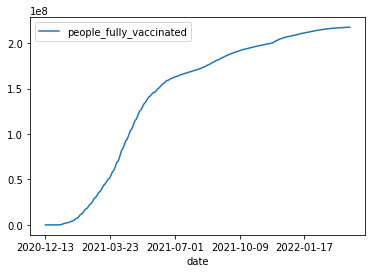

In [30]:
# Creat a plot of fully vaccinated people in the US over time
usa_df.plot(x='date',y="people_fully_vaccinated",kind="line")

### 1.9 Concat & Merge

#### 1.9.1 Concat
Concatenating `DataFrames` is the process of taking two or more `DataFrames` and stacking their rows together into one `DataFrame`. 

To do this place the individual `DataFrames` in a `list` and use the following function

    pd.concat([df_1, df_2, df_3...])
    
This can only be done if the `DataFrames` have the same columns.

In [31]:
df_1 = df.iloc[900:903,:]
df_2 = df.iloc[1900:1903,:]
df_3 = df.iloc[30000:30003,:]

In [32]:
df_3.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
30000,Gibraltar,GIB,2021-08-01,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,267.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Gibraltar,https://twitter.com/GibraltarGov/status/150700...
30001,Gibraltar,GIB,2021-08-02,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,297.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Gibraltar,https://twitter.com/GibraltarGov/status/150700...
30002,Gibraltar,GIB,2021-08-03,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,267.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Gibraltar,https://twitter.com/GibraltarGov/status/150700...


In [33]:
cat_df = pd.concat([df_1,df_2,df_3])

cat_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
900,Algeria,DZA,2021-04-06,NaN,NaN,NaN,NaN,22369.0,NaN,NaN,NaN,501.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
901,Algeria,DZA,2021-04-07,NaN,NaN,NaN,NaN,22369.0,NaN,NaN,NaN,501.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
902,Algeria,DZA,2021-04-08,NaN,NaN,NaN,NaN,22369.0,NaN,NaN,NaN,501.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
1900,Angola,AGO,2021-11-05,NaN,NaN,NaN,NaN,90833.0,NaN,NaN,NaN,2677.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
1901,Angola,AGO,2021-11-06,NaN,NaN,NaN,NaN,98076.0,NaN,NaN,NaN,2890.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
1902,Angola,AGO,2021-11-07,7246966.0,5269623.0,1977343.0,NaN,105320.0,21.36,15.53,5.83,3104.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
30000,Gibraltar,GIB,2021-08-01,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,267.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Gibraltar,https://twitter.com/GibraltarGov/status/150700...
30001,Gibraltar,GIB,2021-08-02,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,297.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Gibraltar,https://twitter.com/GibraltarGov/status/150700...
30002,Gibraltar,GIB,2021-08-03,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,267.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Gibraltar,https://twitter.com/GibraltarGov/status/150700...


#### 1.9.2 Exercise
Merging data involves taking two separate datasets and combining their columns. This is done by matching the values in one column of a `DataFrame` with the values in one column of another `DataFrame`


To demonstrate how to merge two `DataFrames` we are going to load a new dataset that contains GDP data by year for different countries. Once we have loaded the `DataFrame` we will then add the GDP information for each country as a new column in our existing `DataFrame`.

In [34]:
gdp_df = pd.read_csv("data/country_gdp.csv") # This code will generate an error

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 68


This is a common error and happens when there are rows at the beginning of your data that are not part of the data. 

These extra rows are usually some metadata about your dataset.

If we look at our .csv file we can see that the file starts with the following lines

    0	﻿"Data Source"	World Development Indicators	
    1			
    2	Last Updated Date	2023-07-25	
    3			
    4	Country Name	Country Code	Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"
    5	Aruba	ABW	GDP (current US$)","NY.GDP.MKTP.CD",",",",",",",",",",",",",",",",",",",",",",",",",",","405586592.178771","487709497.206704","596648044.692737","695530726.256983","764804469.273743","872067039.106145","958659217.877095","1083240223.46369","1245810055.86592","1320670391.06145","1379888268.15642","1531843575.41899","1665363128.49162","1722905027.93296","1873184357.5419","1896648044.69274","1962011173.18436","2044134078.21229","2254748603.35196","2359776536.31285","2469832402.23464","2677653631.28492","2843016759.77654","2553631284.9162","2453631284.9162","2637988826.81564","2615083798.88268","2727932960.89385","2791061452.51397","2963128491.62011","2983798882.68156","3092178770.94972","3276187709.49721","3395793854.7486","2610038938.54749","3126019385.47486","

Here the header row is actually on line 4. The error we got occurs when the first row `pd.read_csv` reads has a different number of columns then a future row.

**TODO:** Go to the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for `pd.read_csv` and figure out how to load the `.csv` file without an error such that the header row is correct. 

Once you have loaded the data into a `DataFrame`, create a new `DataFrame` that contains only the country code column, and the column with the most recent GDP data that contains the fewest missing values.

**Solution:**

To skip the extra rows and fix your error you can use the syntax

    df = pd.read_csv(file_path,skiprows=num_rows)
    
Or you can specify the row number that contains the header

    df = pd.read_csv(file_path,header=header_number)
    
**Note**: Empty rows in your data **don't count** towards the row number for the `header` argument, but they **do count** towards rows to skip for the `skiprows` argument

In [ ]:
# The following are equivalent ways to load the csv file with gdp data
# gdp_df = pd.read_csv("data/country_gdp.csv",skiprows=4) # Load gdp data skipping the first 4 rows in csv file

gdp_df = pd.read_csv("data/country_gdp.csv",header=2) # Load gdp data using the row at index 2 as the header 

gdp_df.head()

Using the `.info()` function we can see that the two years with the most Non-Null values (260) are 2011 and 2014. Thus, we will use the 2014 data as it is the more recent year.

In [ ]:
# Check the Non-Null Count for each column
gdp_df.info()

In [ ]:
# Select only the country code and the data from 2014
# TODO finish the following line of code
gdp_small = gdp_df[["Country Code","2014"]]

gdp_small.head()

#### 1.9.3 Merge
To make merging the data easier we are going to rename the Country Code column so that it matches the name of the country code column in our other `DataFrame`.

Additionally, we can rename the column with the gdp values to be "gdp" so that it will be clear what the data in the column means after we merge. 

In [ ]:
# Rename Columns to match vaccination dataset and provide clarity
gdp_small.columns = ["iso_code","gdp"]

gdp_small.head()

Now that we have created the `DataFrame` that we would like to merge, we can use the `pd.merge` function to combine the two `DataFrames`

    pd.merge(df_1,df_2,on=column_to_match)
    
By default, the `pd.merge` function will try and match the `Index` of the two `DataFrames`. By specifying the `on` argument in the function, we can choose which column we would like to match. 

In [ ]:
# Merge the gdp data with our vaccination data by matching country codes 
merged_df = pd.merge(clean_df,gdp_small,on="iso_code")

In [ ]:
merged_df.head()

### 1.10 Group by

**Group by** refers to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

We will show a very basic example of how to do these steps below, but for more complex grouping examples check out the `pandas` [grouping documentation](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)

The `.groupby` function will perform the grouping and is typically combined with the function you wish to apply to the groups.

    df.groupby(column_name).<function_to_apply>
    
In the example below, we will group the `DataFrame` by each country, and then apply the `max()` function to get the maximum value of each column.

In [ ]:
# Group the DataFrame by the country name and apply the max() function to each column
clean_df.groupby('country').max()

The output that results contains the same columns as our original `DataFrame`, but the `Index` is now the country name and each column contains only the maximum value from the previous `DataFrame`

You can also use `groupby` and apply one or more functions to only specific columns

    df.groupby(column_to_group)[column_to_apply].<function_to_apply>
    
Below we will do the same grouping, but only find the maximum value of one column as well as sort the results from highest to lowest

In [ ]:
# Group the DataFrame by the country name, select only one column, apply the max() function, and then apply the sort_values function
clean_df.groupby('country')["people_fully_vaccinated_per_hundred"].max().sort_values(ascending=False)

Similar to a `DataFrame`, you can use the `.plot` function to make quick plots of your `groupby` objects.

In [ ]:
# Group the DataFrame by the country name, select only one column, apply the max() function, and then apply the sort_values function
vax_per_ctry = clean_df.groupby('country')["people_fully_vaccinated_per_hundred"].max().sort_values(ascending=False)

vax_per_ctry.plot(kind='bar')